(sup_reg_ex: develop-2)=
# Regression Model Development (part 2)

In [1]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#it only needs to be executed once per file.
#We'll import libraries as needed, but when submitting, having them all at the top is the best practice
import pandas as pd

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing sepal-length as the independent variable. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

## Processing Categorical Data (the right way)

In the previous section, we avoided the additional complexity of processing categorical data by simply removing it. While this sped things along, it also dropped potentially valuable insight from our analysis. Now that the code is working, we'll rebuild our models using that categorical data -the `type` feature.

In [2]:
df_sample = df.sample(n=10, random_state = 152)
# df_sample_highlight = pd.concat([df_sample.iloc[:5,:], df_sample.iloc[-5:,:]]).style.format().set_properties(subset=['type'], **{'background-color': 'yellow'})

# function definition
def highlight_cols(s):
    color = 'null'
    if s == 'Iris-virginica': color = 'limegreen'
    elif s == 'Iris-setosa': color = 'lightblue'
    elif s == 'Iris-versicolor': color = 'orange'
    # color = 'red' if s == 'Iris-virginica' or 'blue' if s == 'Iris-setosa'
    return 'background-color: % s' % color
  
# highlighting the cells
df_sample.style.applymap(highlight_cols)


,sepal-length,sepal-width,petal-length,petal-width,type
38,4.400000,3.000000,1.300000,0.200000,Iris-setosa
115,6.400000,3.200000,5.300000,2.300000,Iris-virginica
36,5.500000,3.500000,1.300000,0.200000,Iris-setosa
122,7.700000,2.800000,6.700000,2.000000,Iris-virginica
21,5.100000,3.700000,1.500000,0.400000,Iris-setosa
7,5.000000,3.400000,1.500000,0.200000,Iris-setosa
89,5.500000,2.500000,4.000000,1.300000,Iris-versicolor
48,5.300000,3.700000,1.500000,0.200000,Iris-setosa
51,6.400000,3.200000,4.500000,1.500000,Iris-versicolor
127,6.100000,3.000000,4.900000,1.800000,Iris-virginica


We have three mutually exclusive flower types, equally distributed, in this feature:

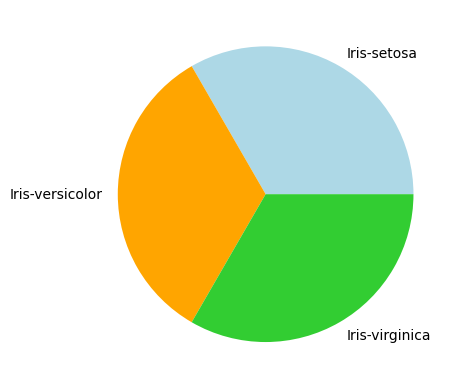

In [3]:
df.groupby('type').size().plot(kind='pie',colors = ['lightblue', 'orange', 'limegreen']);


In [4]:
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import os

def plot_with_alt_text(alt_text =''):
     i = 0 #filename counter
     outputName = 'output_plot'+str(i)+'.png'
     match = True
     while(match == True):
          if os.path.isfile(outputName):
               i = i+1
               outputName = 'output_plot'+str(i)+'.png'
          else: match = False
     plt.savefig(outputName)
     plt.savefig('../../_build/html/task2_c/example_sup_class/'+outputName)
     display(HTML(f'<img src="{outputName}" alt="{alt_text}">'), clear = True)
     plt.close()

df.groupby('type').size().plot(kind='pie',colors = ['lightblue', 'orange', 'limegreen']);
plot_with_alt_text('A piechart is shown. The graph is split into three equal groups \
    + Orange = Iris-versicolot, green = Iris-virginica, and blue = Iris-setosa.')

Recall, a coding [error was returned](sup_reg_ex: develop: train) after inputting this data directly into `linear_reg_model.fit`. This occurred because the algorithm did not how to process categorical independent variables. This isn't a problem when using dependent categorical variables for classification models as in our [classification example](sup_class_ex:develop). Those algorithms are written to expect dependent categorical variables -as they always classify categories. 

But algorithms like numbers and there are many instances when ML models can only interpret numerical data. Furthermore, how categories should be represented requires an understanding of the data. Something the algorithm doesn't have. Thus *feature encoding*, processing data into numerical form, is an essential data analytical skill. To do this properly you should understand your data before preceding. 

For example, we could simply re-label the types as follows:

$$ 
  \text{Iris-setosa} \rightarrow 1 \\
  \text{Iris-versicolor} \rightarrow 2 \\
  \text{Iris-virginica} \rightarrow 3 \\
$$

   
and hand this off to the algorithm. While this would fix the coding error, any mathematical interpretation of this re-labeling would be meaningless, e.g., `Iris-setosa` is not twice as much as `Iris-versicolor`, nor does `setosa` + `versicolor` = `virginica` -the type is just a name. We call this type of categorical data *nominal.* Categories with an inherent order, e.g., grades, pay grades, bronze-silver-gold, etc., are called *ordinal.* But that doesn't apply here either. A flower either is an `Iris-setosa` OR it isn't. Each type is similarly binary so we can interpret *each unique type as a unique feature*, with a 1 or 0, indicating whether the category applies or not.

Most machine learning libraries are equipped with built-in preprocessing functions; see the available options in the docs: [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). For simplicity, we'll start with Pandas' built-in [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). However, it will often be best to use functions specifically written for your model's library, such as sklearn's [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). 

In [5]:
after_pd_dummy = pd.get_dummies(df_sample)

In [6]:
#highlight values according to column names and values. 
def highlight_cols_dummy(col):
    if col.name == 'type_Iris-setosa':
        return ['background-color: lightblue' if c == 1 else '' for c in col.values]
    elif col.name == 'type_Iris-versicolor':
        return ['background-color: orange' if c == 1 else '' for c in col.values]
    elif col.name == 'type_Iris-virginica':
        return ['background-color: lightgreen' if c == 1 else '' for c in col.values]
    else:
        return ['background-color: null' for c in col.values]

# #Nice displays are nice but not required. 
from IPython.display import display_html, HTML
before_styler = df_sample[['type']].style.set_table_attributes("style='display:inline'").set_caption('Before').applymap(highlight_cols).format(precision = 1)
after_styler = after_pd_dummy[['type_Iris-setosa','type_Iris-versicolor','type_Iris-virginica']].style.set_table_attributes("style='display:inline'").set_caption('After <em>get_dummy</em>').apply(highlight_cols_dummy).format(precision = 1)
space = "\xa0" * 10 #space between columns
# arrow = "<html> <big><big><big><big><big>&#8680;</big></big></big></big></big> </html>"
# arrow = <big><big><big><big><big>&#8680;</big></big></big></big></big>

arrow = '<table style="width:5%"> \
    <tr> \
        <th> <br> <br> <big><big><big><big><big>&#8680;</big></big></big></big></big> <br> <br> </th> \
    </tr>'

# df_sample[['type']]
# displays dataframes side by side
display_html(before_styler._repr_html_() + space + after_styler._repr_html_(), raw=True)

,type
38,Iris-setosa
115,Iris-virginica
36,Iris-setosa
122,Iris-virginica
21,Iris-setosa
7,Iris-setosa
89,Iris-versicolor
48,Iris-setosa
51,Iris-versicolor
127,Iris-virginica


This process is called [vectorization](https://neptune.ai/blog/vectorization-techniques-in-nlp-guide#:~:text=In%20Machine%20Learning%2C%20vectorization%20is%20a%20step%20in,train%20on%2C%20by%20converting%20text%20to%20numerical%20vectors). Now we can include `type` in the training and testing of a model:  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
linear_reg_model_types = LinearRegression()
linear_reg_model_types.fit(X_train,y_train)
y_pred = linear_reg_model_types.predict(X_test)

sme = mean_squared_error(y_test, y_pred)
print('MSE using types is :' + str(sme))

MSE using types is :0.12921261168601364


When including the flower types, our linear model has a mean squared error of $\approx 0.129$. Recall from the previous section without the flower types, we had a MSE of abot $0.123$.

So did it get worse? No. Our data changed and you can't simply compare MSE's from different cases. Converting `types` to numerical features, added three dimensions to the previous example. Moving from three to a *six-*dimensional space. Consider the change from just two to three dimensions, e.g., $2^{2}=4$ to $2^{3}=8$. Adding dimensions can radically increase the volume of space making the available data relatively sparse -what's known as the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). -However, that's not the full story here. While, both `petal-length` and `petal-width` appear positively correlated with `sepal-length`for `versicolor` and `virginica` it does *not* for `setosa` (blue below), 

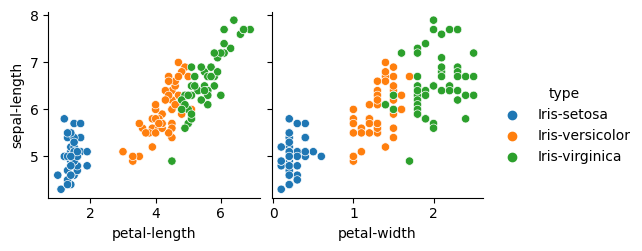

In [8]:
import seaborn as sns

#correlogram
sns.pairplot(df,x_vars = ['petal-length','petal-width'], y_vars=['sepal-length'], hue='type');

In [9]:
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import os

#This code helps support alt text for student accessibility.
#This section and uses of 'plot_with_alt' are intended only for publishing to the webpage.
#Including alt text is good practice but not required for Task 2.    

# A function to support adding alt text to Python-generated images.
# Pandas, matplotlib, and others don't yet natively support alt ext. 
   
def plot_with_alt_text(alt_text =''):
     i = 0 #filename counter
     outputName = 'output_plot'+str(i)+'.png'
     match = True
     while(match == True):
          if os.path.isfile(outputName):
               i = i+1
               outputName = 'output_plot'+str(i)+'.png'
          else: match = False
     plt.savefig(outputName)
     plt.savefig('../../_build/html/task2_c/example_sup_reg/'+outputName)
     display(HTML(f'<img src="{outputName}" alt="{alt_text}">'))
     plt.close()

sns.pairplot(df,x_vars = ['petal-length','petal-width'], y_vars=['sepal-length'], hue='type');     
plot_with_alt_text('Two scatterplots are shown side by side. The y-axis for both is sepal-length. \
     The x-axis is petal-length and petal-length for the left and right plot, respectively. \
     Both plots similarly show positive linear correlations for the color-coded Iris-versicolor and Iris virginica data points. \
     The Iris-setosa data points are grouped in the lower-left quadrant of both plots with little linear correlation.')


The drop in accuracy is in part a limitation of our simple linear model trying to make use of a feature pulling the model in the wrong direction. Making the most out of your data involves a mix of understanding the data and the applied algorithm(s) (which don't understand anything). Using three different linear models yields better results:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


df_dummy = pd.get_dummies(df)
df_dummy
df_s = df_dummy.loc[df_dummy['type_Iris-setosa'] == 1].drop(columns=['type_Iris-versicolor', 'type_Iris-virginica'])
df_v = df_dummy.loc[df_dummy['type_Iris-versicolor'] == 1].drop(columns=['type_Iris-setosa', 'type_Iris-virginica'])
df_g = df_dummy.loc[df_dummy['type_Iris-virginica'] == 1].drop(columns=['type_Iris-setosa', 'type_Iris-versicolor'])

def line_regression_pipe(df_list):
    for df in df_list:
        X = df.drop(columns=['sepal-length']) #indpendent variables
        y = df[['sepal-length']].copy() #dependent variables
        #split the variable sets into training and testing subsets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
        linear_reg_model_a = LinearRegression()
        linear_reg_model_a.fit(X_train,y_train)
        y_pred = linear_reg_model_a.predict(X_test)
        sme = mean_squared_error(y_test, y_pred)
        print('MSE of ' + df.columns[4] + ' is :' + str(sme) )

df_list = [df_s, df_v, df_g]
line_regression_pipe(df_list)


MSE of type_Iris-setosa is :0.06604867484155268
MSE of type_Iris-versicolor is :0.09862408497975977
MSE of type_Iris-virginica is :0.0802189108860733


The goal of this section was to illustrate how to incorporate independent categorical variables. Though it starts with converting strings to numbers, how those conversations are done is important to consider. Moreover, the introduction of more features can impact both the computational efficiency and accuracy of the model.